<a href="https://colab.research.google.com/github/Brokenx25/AR-AI_project/blob/cnn-cw/adam_sgd_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SGD + ADAM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


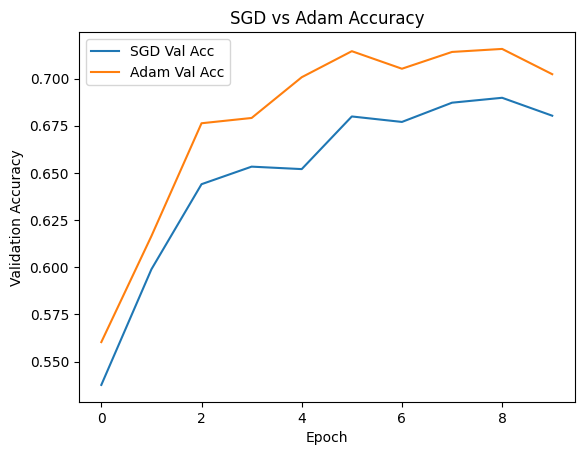

In [11]:
# Compare SGD vs Adam Training
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

def build_model():
    return models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

# SGD Model
model_sgd = build_model()
model_sgd.compile(optimizer=SGD(learning_rate=0.01, momentum=0.9),
                  loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
model_sgd.save("cnn_compare_sgd.keras")

# Adam Model
model_adam = build_model()
model_adam.compile(optimizer=Adam(),
                   loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=0)
model_adam.save("cnn_compare_adam.keras")

# Plot comparison
plt.plot(history_sgd.history['val_accuracy'], label='SGD Val Acc')
plt.plot(history_adam.history['val_accuracy'], label='Adam Val Acc')
plt.title("SGD vs Adam Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.show()


 SGD Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245,142 (957.59 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 122,572 (478.80 KB)


 Model Parameters:
  Total parameters: 122570
  Trainable: 122570
  Non-trainable: 0


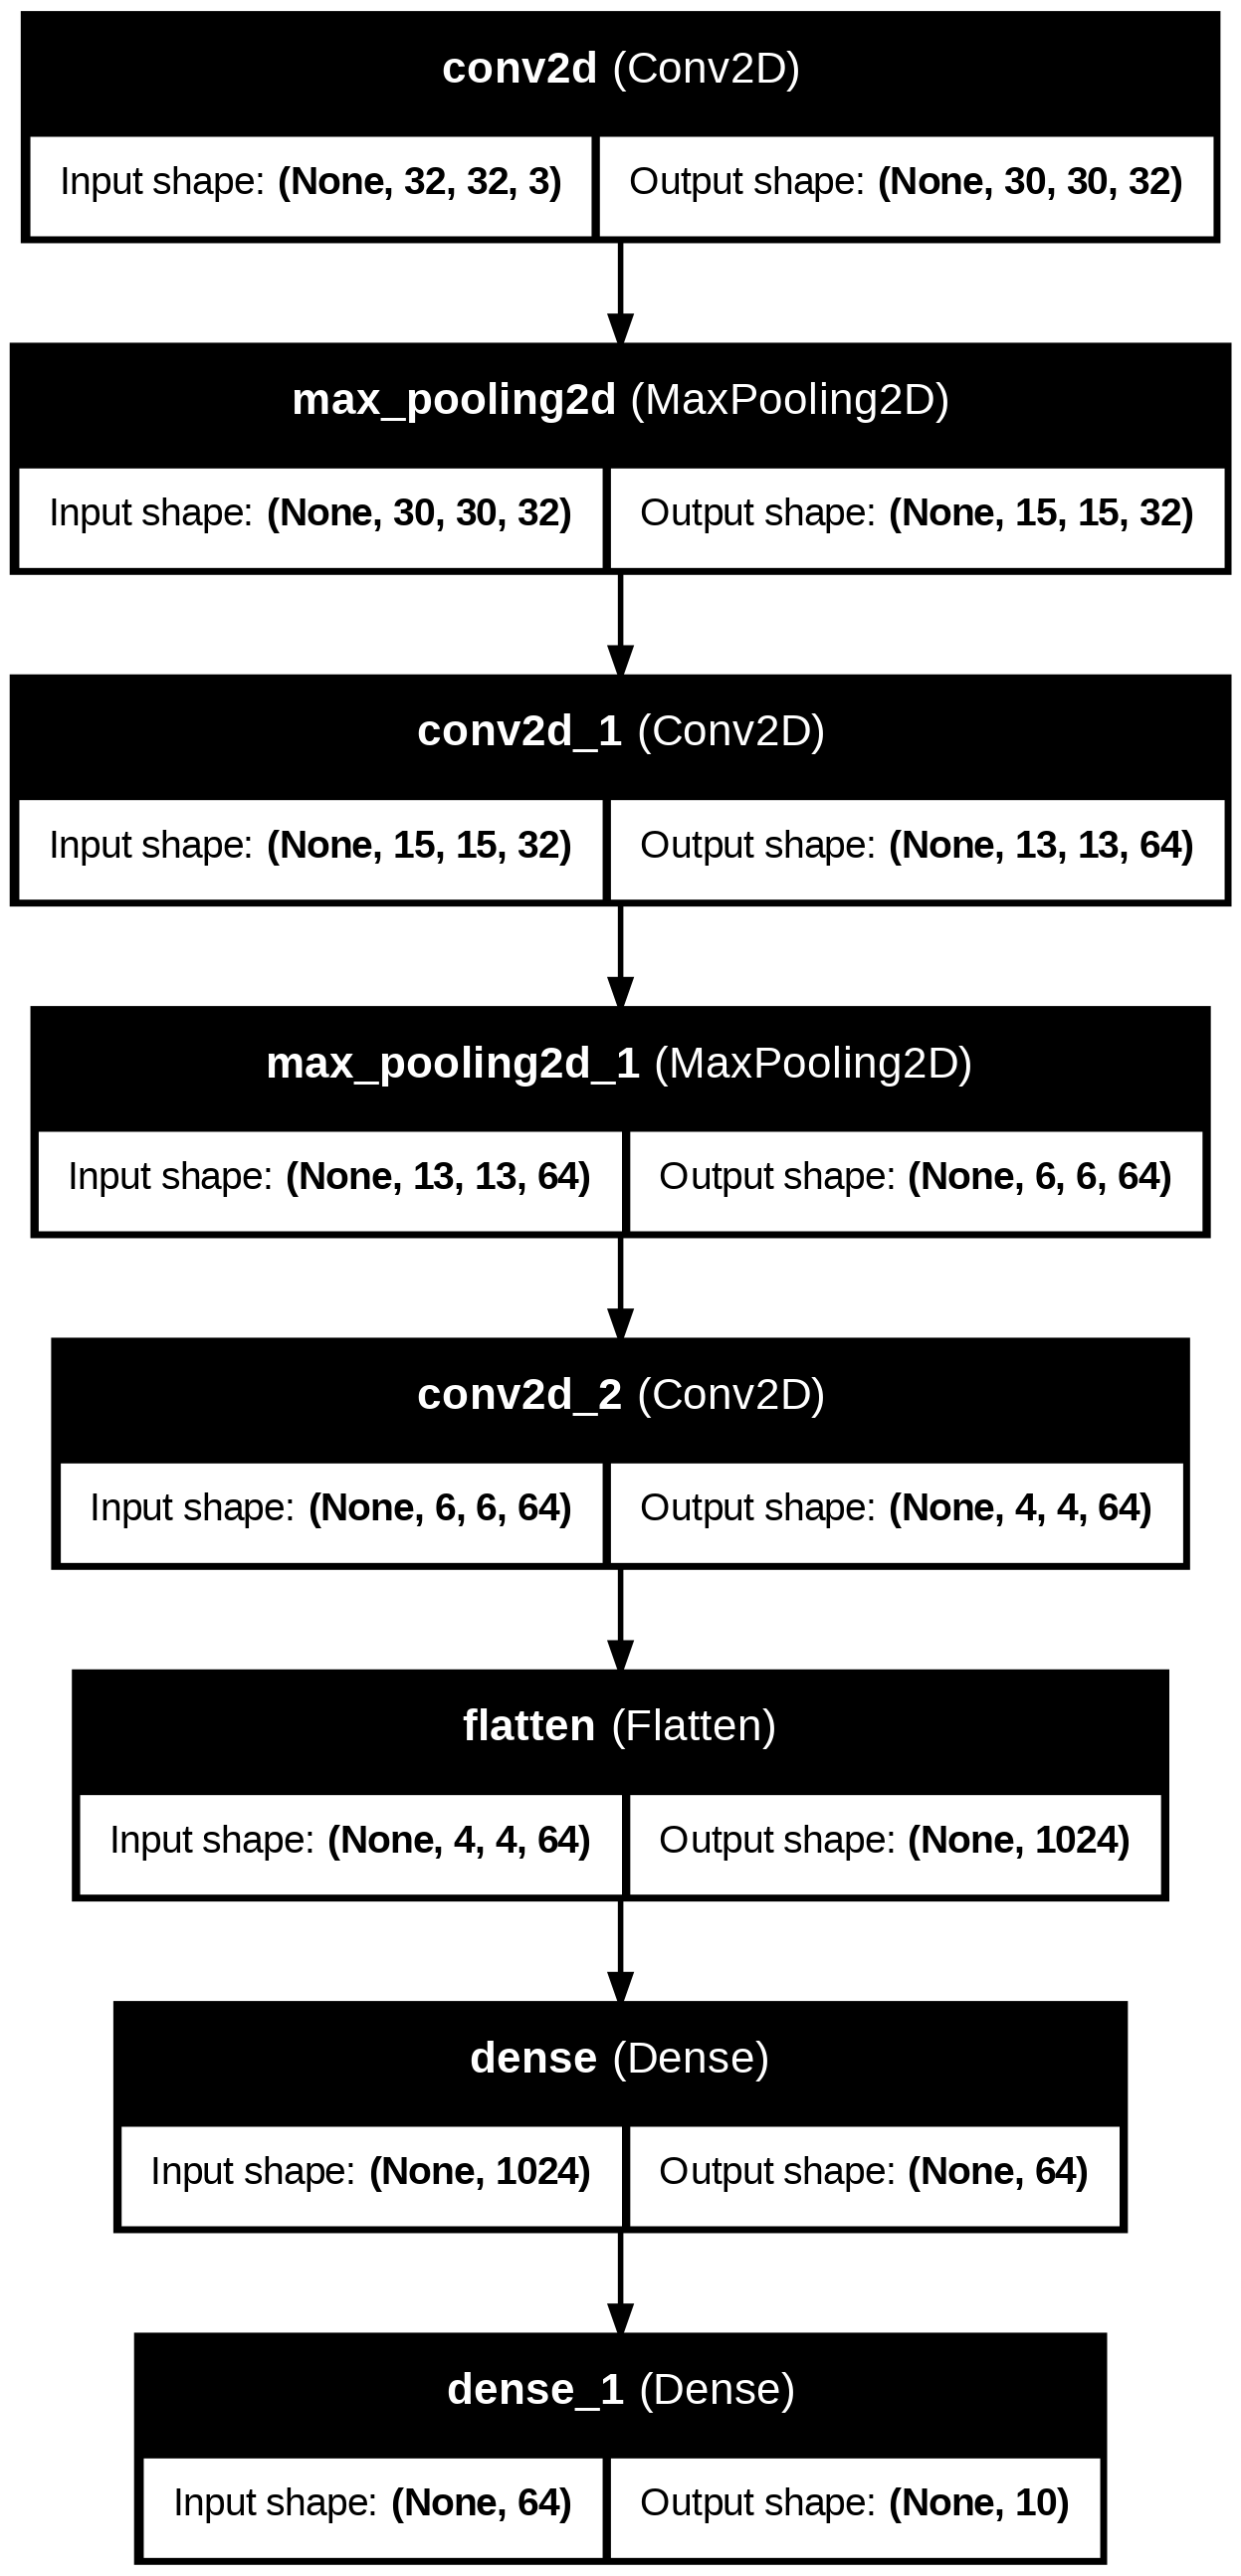

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# Load the model
model = load_model("cnn_compare_sgd.keras")

# Build the model if needed
try:
    model.build(input_shape=(None, 32, 32, 3))  # Assuming CIFAR-10 input shape
except:
    pass

# 1. Print model summary
print(" SGD Model Summary:")
model.summary()


# 3. Total Parameters
print("\n Model Parameters:")
print(f"  Total parameters: {model.count_params()}")
print(f"  Trainable: {sum([layer.count_params() for layer in model.layers if layer.trainable])}")
print(f"  Non-trainable: {sum([layer.count_params() for layer in model.layers if not layer.trainable])}")

# 4. Optional: Visualize model structure
try:
    plot_model(model, show_shapes=True, show_layer_names=True, to_file="model_architecture.png")
    from IPython.display import Image
    display(Image(filename="model_architecture.png"))
except Exception as e:
    print(f"Diagram plot skipped: {e}")


 ADAM Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 367,712 (1.40 MB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 245,142 (957.59 KB)


 Model Parameters:
  Total parameters: 122570
  Trainable: 122570
  Non-trainable: 0


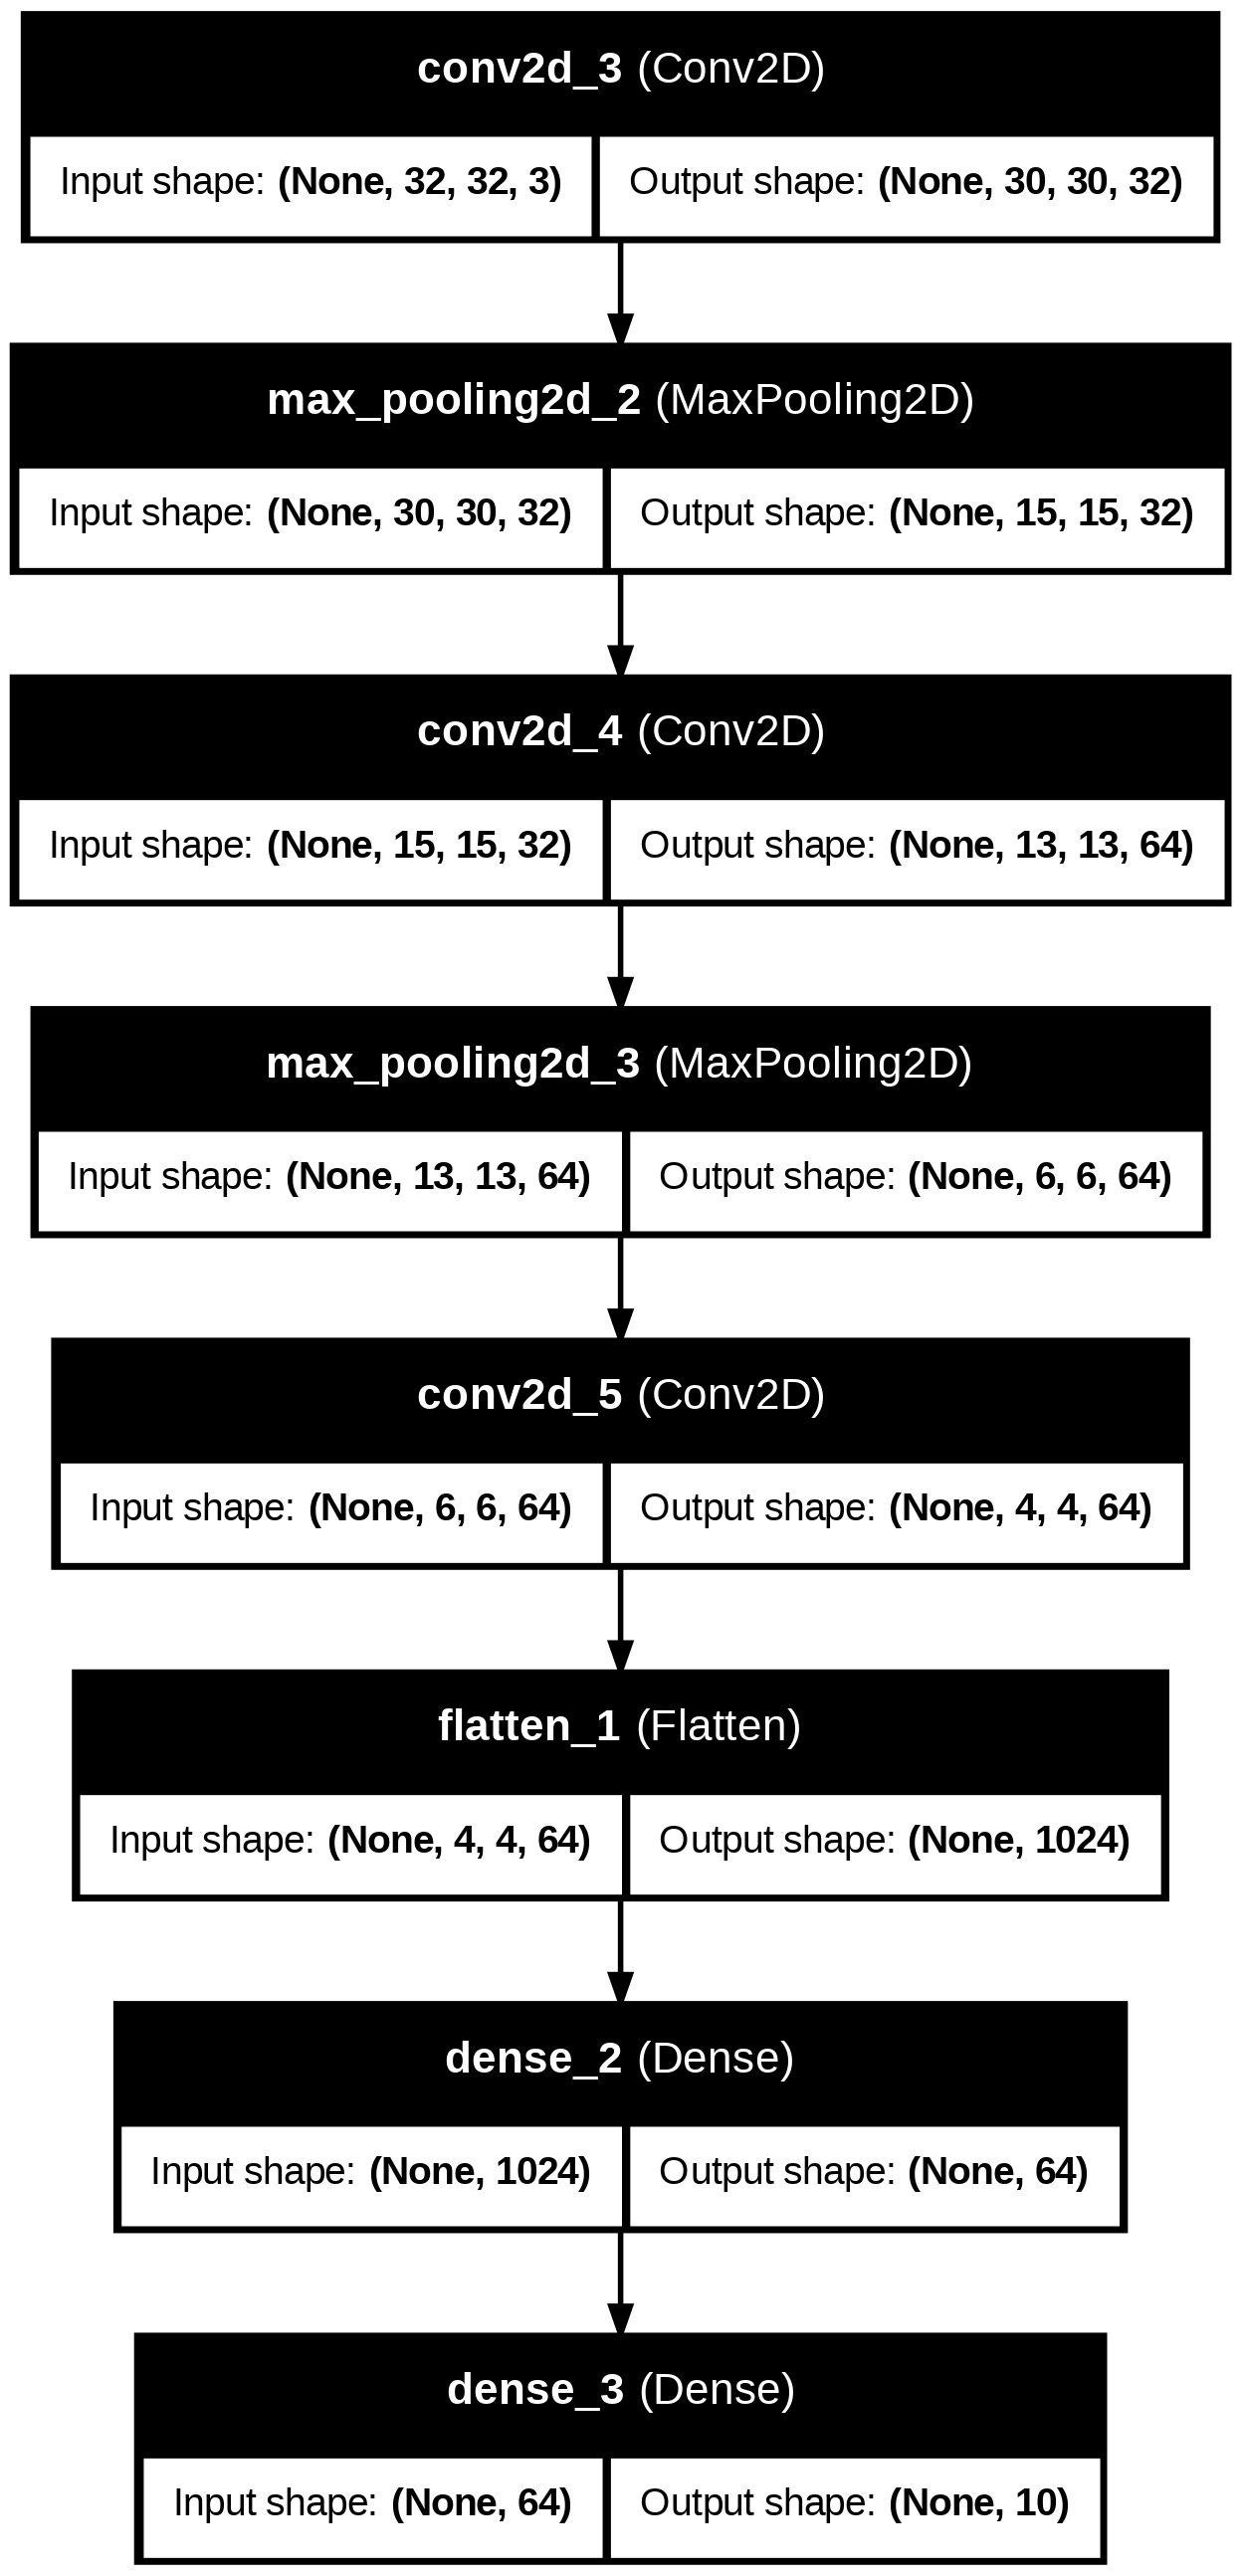

In [4]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model

# Load the model
model = load_model("cnn_compare_adam.keras")

# Build the model if needed
try:
    model.build(input_shape=(None, 32, 32, 3))  # Assuming CIFAR-10 input shape
except:
    pass

# 1. Print model summary
print(" ADAM Model Summary:")
model.summary()


# 3. Total Parameters
print("\n Model Parameters:")
print(f"  Total parameters: {model.count_params()}")
print(f"  Trainable: {sum([layer.count_params() for layer in model.layers if layer.trainable])}")
print(f"  Non-trainable: {sum([layer.count_params() for layer in model.layers if not layer.trainable])}")

# 4. Optional: Visualize model structure
try:
    plot_model(model, show_shapes=True, show_layer_names=True, to_file="model_architecture.png")
    from IPython.display import Image
    display(Image(filename="model_architecture.png"))
except Exception as e:
    print(f"Diagram plot skipped: {e}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


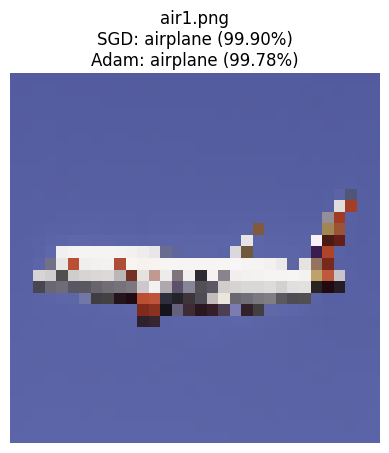

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


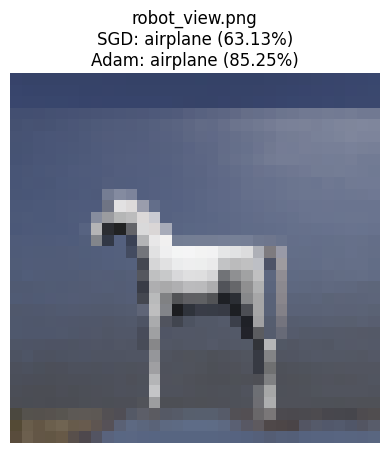

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


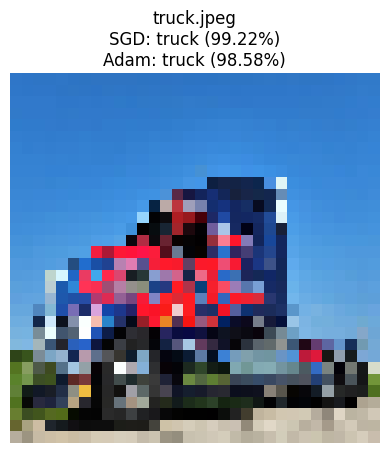

In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2

# CIFAR-10 classes
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

uploaded_image_filenames = ["air1.png", "robot_view.png", "truck.jpeg"] # add the images here

# Load both models
model_sgd = tf.keras.models.load_model("cnn_compare_sgd.keras")
model_adam = tf.keras.models.load_model("cnn_compare_adam.keras")

for fname in uploaded_image_filenames:
    img = cv2.imread(fname)
    img = cv2.resize(img, (32, 32))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_norm = img / 255.0
    img_input = np.expand_dims(img_norm, axis=0)

    pred_sgd = model_sgd.predict(img_input)
    pred_adam = model_adam.predict(img_input)

    class_sgd = class_names[np.argmax(pred_sgd)]
    class_adam = class_names[np.argmax(pred_adam)]

    plt.imshow(img)
    plt.title(f"{fname}\nSGD: {class_sgd} ({np.max(pred_sgd)*100:.2f}%)\nAdam: {class_adam} ({np.max(pred_adam)*100:.2f}%)")
    plt.axis('off')
    plt.show()
